In [11]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
# load data
loan = pd.read_csv('./data/loans.csv')

In [12]:
loan.head()

,credit_policy,purpose,interest_rate,installment,log_annual_income,dti,fico_score,days_with_credit_line,revolving_balance,revol_util,number_inquiry_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [13]:
loan.dtypes

credit_policy                  int64
purpose                       object
interest_rate                float64
installment                  float64
log_annual_income            float64
dti                          float64
fico_score                     int64
days_with_credit_line        float64
revolving_balance              int64
revol_util                   float64
number_inquiry_last_6mths      int64
delinq_2yrs                    int64
pub_rec                        int64
not_fully_paid                 int64
dtype: object

In [16]:
loan.isnull().sum()

credit_policy                0
purpose                      0
interest_rate                0
installment                  0
log_annual_income            0
dti                          0
fico_score                   0
days_with_credit_line        0
revolving_balance            0
revol_util                   0
number_inquiry_last_6mths    0
delinq_2yrs                  0
pub_rec                      0
not_fully_paid               0
dtype: int64

C:\Users\sbohora\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


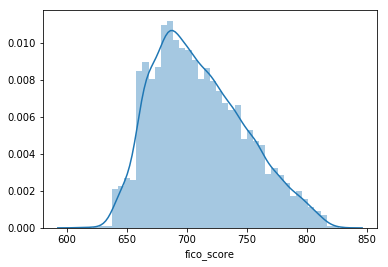

In [17]:
sns.distplot(loan["fico_score"])

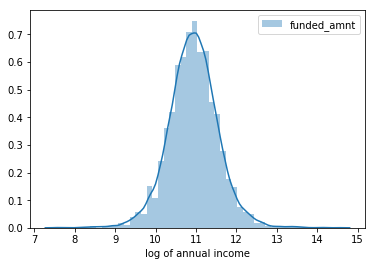

In [18]:
plt.figure()
sns.distplot(loan["log_annual_income"], label="funded_amnt")
plt.legend()
plt.xlabel("log of annual income")
plt.show()

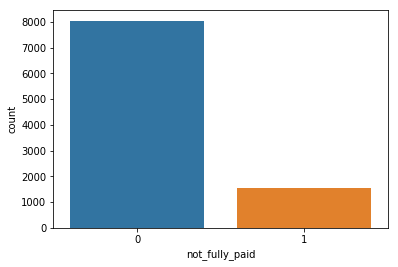

In [19]:
sns.countplot(loan["not_fully_paid"])

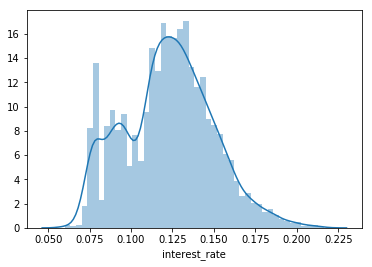

In [20]:
sns.distplot(loan["interest_rate"])

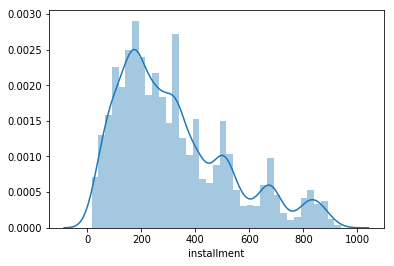

In [21]:
sns.distplot(loan["installment"])

In [22]:
loan.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

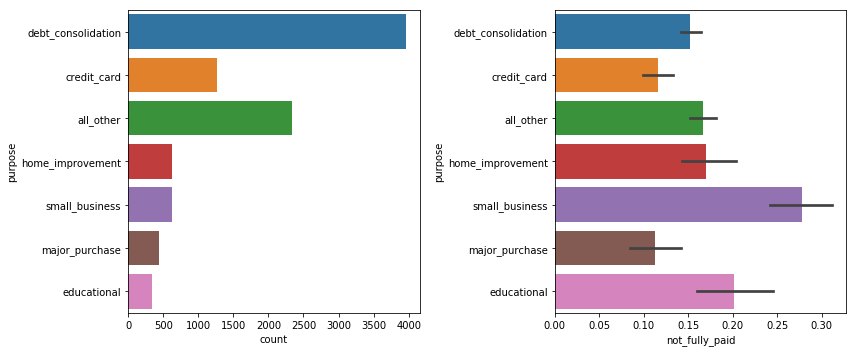

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(y=loan["purpose"])
plt.subplot(1,2,2)
sns.barplot(y="purpose", x="not_fully_paid", data=loan)
plt.tight_layout()
plt.show()

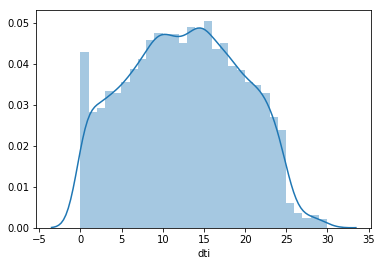

In [24]:
sns.distplot(loan.dti)

In [25]:
loan.delinq_2yrs.isnull().sum()

0

In [28]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [43]:
# # Save the number of columns in predictors: n_cols
# n_cols = predictors.shape[1]

# # Set up the model: model
# model = Sequential()

# # Add the first layer
# model.add(Dense(50, activation="relu", input_shape=(n_cols,)))

# # Add the second layer
# model.add(Dense(32, activation="relu"))

# # Add the output layer
# model.add(Dense(1))

from sklearn.model_selection import train_test_split
y = loan.not_fully_paid
X = loan.drop(["not_fully_paid","purpose"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [44]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (7662, 12)
Shape of y_train:  (7662,)
Shape of x_test:  (1916, 12)
Shape of y_test:  (1916,)


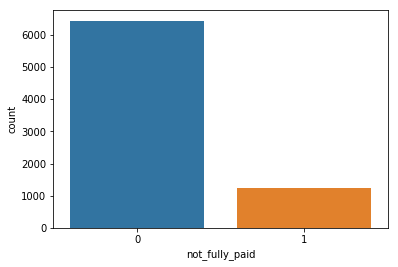

In [45]:
sns.countplot(y_train)
sns.countplot(y_test)

In [46]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

def encode_neural_net_y(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_y = encoder.transform(y)
    new_y = np_utils.to_categorical(encoded_y)
    return new_y

# Neural Network model
y_train = encode_neural_net_y(y_train)
y_test = encode_neural_net_y(y_test)

In [47]:
y_test
x_train = np.array(x_train)
x_test = np.array(x_test)
x_test

array([[1.0000e+00, 1.5680e-01, 7.0004e+02, ..., 2.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.5680e-01, 1.1376e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.2730e-01, 5.0350e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 1.4740e-01, 3.4537e+02, ..., 5.0000e+00, 2.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.2210e-01, 3.3315e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.3920e-01, 2.5603e+02, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [75]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from keras.layers.normalization import BatchNormalization

# Specify the model
n_cols = x_train.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# model.summary()

# Fit the model
model.fit(np.array(x_train), np.array(y_train), epochs=30, batch_size=40, verbose=0)

In [57]:
scores = model.evaluate(np.array(x_test), np.array(y_test), verbose=0)
print("====================[TEST SCORE]====================")
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

====================[TEST SCORE]====================
acc: 83.98%


In [58]:
pd.DataFrame(y_test).sum(axis=0)/y_test.shape[0]

0    0.83977
1    0.16023
dtype: float64

In [59]:
preds = model.predict(np.array(x_test))
preds

array([[0.8727493 , 0.12725067],
       [0.85198253, 0.14801744],
       [0.8835598 , 0.11644018],
       ...,
       [0.9342954 , 0.06570458],
       [0.8783656 , 0.12163448],
       [0.9203222 , 0.07967775]], dtype=float32)

In [60]:
preds_class = model.predict_classes(np.array(x_test))
preds_class

1888/1916 [============================>.] - ETA: 0s

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [62]:
y_class = pd.DataFrame(y_test).idxmax(axis=1)
y_class.tail()

1911    0
1912    0
1913    0
1914    0
1915    0
dtype: int64

In [63]:
miss_class = y_class[y_class!=preds_class].value_counts()/y_class.shape[0]
miss_class

1    0.16023
dtype: float64

In [64]:
from sklearn.metrics import confusion_matrix
cf_mat = confusion_matrix(y_class, preds_class)
cf_mat_p = cf_mat/cf_mat.sum()
cf_mat_p

array([[0.83977035, 0.        ],
       [0.16022965, 0.        ]])

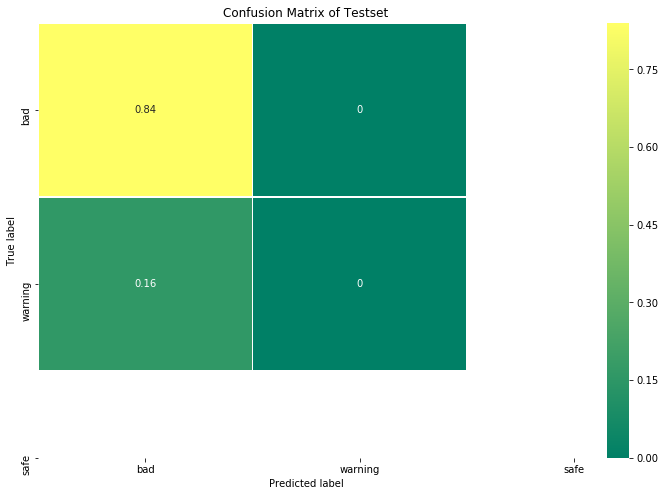

In [65]:
# Plot normalized confusion matrix
import matplotlib.cm as cm
plt.figure(figsize=(12,8))
sns.heatmap(cf_mat_p, annot=True, linewidths=.5, cmap=cm.summer,xticklabels=['bad','warning','safe'], yticklabels=['bad','warning','safe'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix of Testset")
plt.show()

In [77]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
acc: 83.87%
